## DATA VISUALIZATION
### Yahoo Finance Cryptocurrencies - 13521100 Alexander Jason

In [2]:
# Library Import
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON files into pandas DataFrames
crypto_data = pd.read_json('../Data Scraping/data/cryptocurrency_data.json')
price_data = pd.read_json('../Data Scraping/data/price_data.json')
volume_data = pd.read_json('../Data Scraping/data/volume_data.json')

# Display the first few rows of each DataFrame
print("Cryptocurrency Data:")
print(crypto_data.head())
print("\nPrice Data:")
print(price_data.head())
print("\nVolume Data:")
print(volume_data.head())

Cryptocurrency Data:
     Symbol          Name  Market Cap (in M)  Circulating Supply (in M)
0   BTC-USD   Bitcoin USD           588893.0                     19.430
1   ETH-USD  Ethereum USD           232343.0                    120.202
2  USDT-USD    Tether USD            83637.0                  83614.000
3   BNB-USD       BNB USD            39029.0                    155.849
4   XRP-USD       XRP USD            37264.0                  52544.000

Price Data:
     Symbol  Price (Intraday)     Change  % Change
0   BTC-USD      30308.380000 -624.78000     -2.02
1   ETH-USD       1932.940000  -38.07000     -1.93
2  USDT-USD          1.000300   -0.00020     -0.02
3   BNB-USD        250.430000   -2.13000     -0.84
4   XRP-USD          0.709199   -0.01576     -2.17

Volume Data:
     Symbol  Total Volume All Currencies in 24hr (in M)
0   BTC-USD                                   14738.000
1   ETH-USD                                    7389.000
2  USDT-USD                                   

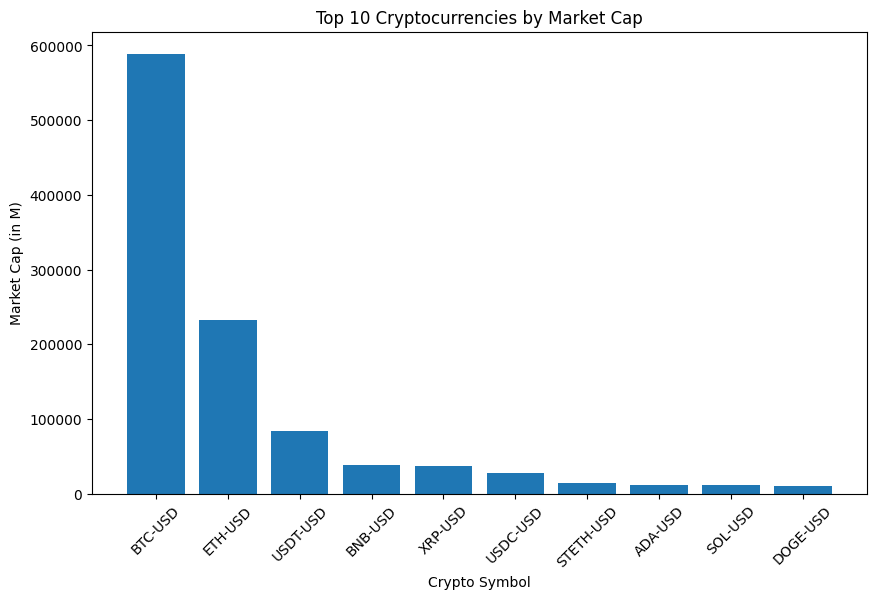

In [8]:
# Sort the cryptocurrencies by market cap in descending order
sorted_crypto_data = crypto_data.sort_values('Market Cap (in M)', ascending=False)

# Select the top N cryptocurrencies
top_n = 10
top_crypto = sorted_crypto_data.head(top_n)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_crypto['Symbol'], top_crypto['Market Cap (in M)'])
plt.xlabel('Crypto Symbol')
plt.ylabel('Market Cap (in M)')
plt.title(f'Top {top_n} Cryptocurrencies by Market Cap')
plt.xticks(rotation=45)
plt.show()


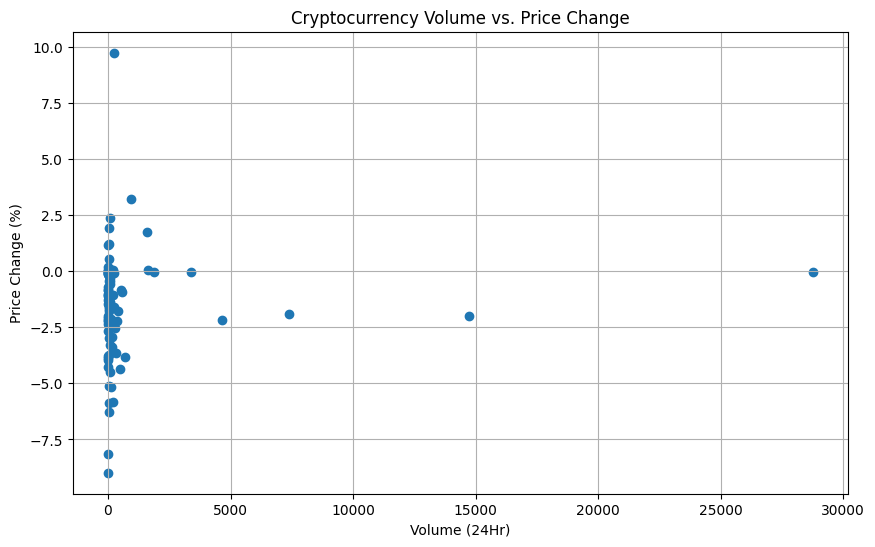

In [10]:
# Merge price_data and volume_data on 'Symbol' column
merged_data = price_data.merge(volume_data, on='Symbol')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Volume All Currencies in 24hr (in M)'], merged_data['% Change'])
plt.xlabel('Volume (24Hr)')
plt.ylabel('Price Change (%)')
plt.title('Cryptocurrency Volume vs. Price Change')
plt.grid(True)
plt.show()

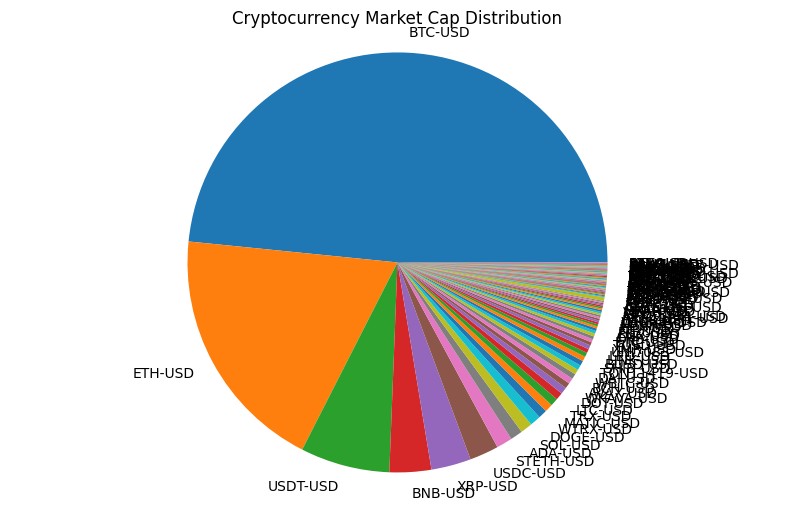

In [14]:
# Calculate the total market cap of all cryptocurrencies
total_market_cap = crypto_data['Market Cap (in M)'].sum()

# Calculate the percentage of each cryptocurrency's market cap
crypto_data['Market Cap Percentage'] = (crypto_data['Market Cap (in M)'] / total_market_cap) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(crypto_data['Market Cap Percentage'], labels=crypto_data['Symbol'])
plt.title('Cryptocurrency Market Cap Distribution')
plt.axis('equal')
plt.show()